In [2]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Problem 1

The solve_ivp solver requires a callable function representing the right hand side of the IVP. Define the function predator_prey() that accepts the current r(t) and w(t) values as a 1d array y, and the current time t, and returns the right hand side of the predator-prey model as a tuple. Use $\alpha$ = 1.0, $\beta$ = 0.5, $\delta$ = 0.75, and $\gamma$ = 0.25 as your growth parameters.

In [9]:
def predator_prey(t, y):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Predator-
            Prey model.
    """
    # define constants
    alpha = 1.0
    beta = 0.5
    delta = 0.75
    gamma = 0.25

    # define differential equations
    dr = y[0]*(alpha-beta*y[1])
    dw = y[1]*(-delta + gamma*y[0])

    return np.array([dr, dw])




# Problem 2

Use solve_ivp to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. Display the resulting rabbit and wolf populations over time (stored as columns in the output of solve_ivp) on the same plot.

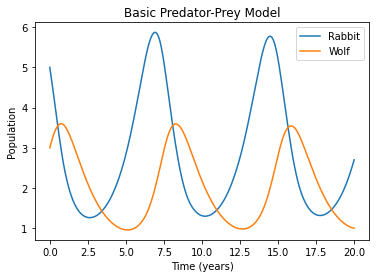

In [12]:
# initial conditions
r0 = 5
w0 = 3
y0 = np.array([r0, w0])

t0 = 0 # years
tf = 20
t_span = (t0, tf)

# solve initial value problem
sol = solve_ivp(predator_prey, t_span, y0, t_eval=np.linspace(t0, tf, 200))

# plot
plt.plot(sol.t, sol.y[0], label='Rabbit')
plt.plot(sol.t, sol.y[1], label='Wolf')
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.title('Basic Predator-Prey Model')
plt.legend(loc='best')

# Problem 3

Similar to problem 1, define the function Lotka_Volterra() that takes in the current preditor and prey populations as a 1d array y and the current time as a float t and returns the right hand side of the Lotka-Volterra predator-prey model with $\eta$ = 1/3.

Using solve_ivp, solve the IVP with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0 = (1/2, 3/4)$, and $y_0 = (1/16, 3/4)$ and time domain $t = [0, 13]$. Plot these three solutions on the same graph as the phase portrait and the equilibria (0, 0) and (1, 1).

Since your solutions are being plotted with the phase portrait, plot the two populations against eachother (instead of both individually against time).

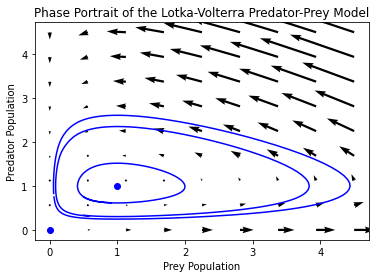

In [24]:
def Lotka_Volterra(t, y):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        t (float): Current time.
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    # define constants
    eta = 1./3

    # define differential equations
    dU = y[0]*(1-y[1])
    dV = eta*y[1]*(y[0]-1)

    return np.array([dU, dV])

# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Lotka_Volterra(0, (Y1, Y2))
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

# loop plot
for r0, w0 in [(1/2, 1/3),(1/2, 3/4),(1/16, 3/4)]:
    y0 = np.array([r0, w0])
    t0 = 0 
    tf = 13
    t_span = (t0, tf)

    # solve initial value problem
    sol = solve_ivp(Lotka_Volterra, t_span, y0, t_eval=np.linspace(t0, tf, 200))

    # plot
    plt.plot(sol.y[0], sol.y[1], color='blue')

plt.plot(0,0, marker='o', color='blue')
plt.plot(1,1, marker='o', color='blue')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of the Lotka-Volterra Predator-Prey Model')
plt.show()

# Problem 4

Define a new function Logistic_Model() that takes in the current preditor and prey populations y and the current time t and returns the right hand side of the logistic predator-prey model as a tuple.

Use solve_ivp to compute solutions (U, V) of (1.3) for initial conditions (1/3, 1/3) and (1/2, 1/5). Do this for parameter values $\eta$, $\rho$ = 1, 0.3 and also for values $\eta$, $\rho$ = 1, 1.1.

Create a phase portrait for the logistic equations using both sets of parameter values. Plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

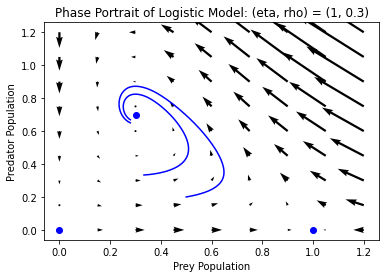

In [43]:
rho = [0.3, 1.1]
for i in range(len(rho)):

    def Logistic_Model(t, y):
        """Compute right hand side of Logistic Predator-Prey model based on
        rabbit and wolf populations at given time.
        
        Parameters:
            y ((2, ) ndarray): A vector representing rabbit and wolf populations 
                at time t.
            t (float): Current time.
            
        Returns:
            (tuple): A tuple corresponding to right hand side of the Logistic 
                Predator-Prey model.
        """
        # define constants
        eta = 1

        # define differential equations
        dU = y[0]*(1-y[0]-y[1])
        dV = eta*y[1]*(y[0]-rho[i])

        return np.array([dU, dV])

    # Provided code for plotting phase portrait.
    Y1, Y2 = np.meshgrid(np.linspace(0,1.2,25), np.linspace(0,1.2,25))
    dU, dV = Logistic_Model(0, (Y1, Y2))
    Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

    # loop plot
    for U, V in [(1/3, 1/3),(1/2, 1/5)]:
        y0 = np.array([U, V])
        t0 = 0 
        tf = 13
        t_span = (t0, tf)

        # solve initial value problem
        sol = solve_ivp(Logistic_Model, t_span, y0, t_eval=np.linspace(t0, tf, 200))

        # plot
        plt.plot(sol.y[0], sol.y[1], color='blue')

    plt.plot(0,0, marker='o', color='blue')
    plt.plot(1,0, marker='o', color='blue')
    plt.plot(rho[i], 1-rho[i], marker='o', color='blue')
    # ax[i].plot(1,1, marker='o', color='blue')
    plt.xlabel('Prey Population')
    plt.ylabel('Predator Population')
    plt.title('Phase Portrait of Logistic Model: (eta, rho) = (1, {})'.format(rho[i]))

    plt.show()

# Problem 5

Write the functions forbes() which takes as input F(t) and returns Forbe’s equation. Also write the function energy_balance() which takes as input F (t), L(t), PAL, and EI and returns the energy balance as given in the lab. Use $\rho_F = 9400$, $\rho_L = 1800$, $\gamma_F =3.2$, $\gamma_L =22$, $\eta_F =180$, $\eta_L =230$, $\beta_{AT} =0.14$.


Using forbes() and energy_balance(), define the function weight_odesystem() which takes as input the current fat and lean weights as an array y and the current time as a float t and return the right hand side of the weight change ODE as a tuple.

# Problem 6

Consider the initial value problem corresponing to (1.4).

$\frac{dF}{dt} = \frac{(1−p(t))EB(t)}{\rho_F}$,

$\frac{dL}{dt} = \frac{p(t)EB(t)}{\rho_L}$,

$F(0) = F_0$, 

$L(0) = L_0$.

The provided function fat_mass() returns the fat mass of an individual based on body weight (kg), age (years), height (meters), and sex. Use this function to define initial conditions $F_0$ and $L_0$ for the IVP above: $F_0 =$ fat_mass($args^*$), $L_0 = BW − F_0$.

Suppose a 38 year old female, standing 5’8” and weighing 160 lbs, reduces her intake from 2143 to 2025 calories/day, and increases her physical activity from little to no exercise (PAL=1.4) to exercising to 2-3 days per week (PAL=1.5).


Use the original intake and phyical activity levels to compute K for this system. Then use solve_ivp to solve the IVP. Graph the solution curve for this single-stage weightloss intervention over a period of 5 years. 


Note the provided code requires quantities in metric units (kilograms, meters, days).

In [6]:
# Provided function.
def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100



# initialize constants (from part 5)
pf = 9400
pl = 1800
gf = 3.2
gl = 22
nf = 180
nl = 230
bat = 0.14
C = 10.4*pl/pf

# initial constants are given
age = 38
height = 1.7272 # meters
BW = 160/2.204 # kilograms
sex = 'female'
PAL = 1.4
F0 = fat_mass(BW, age, height, sex)
L0 = BW-F0
EI = 2143 # calories per day

# calculate K
K = (1/PAL - bat)*EI - gf*F0 - gl*L0

def forbes(F):
    """returns Forbes's equation"""
    # p(t) = C/(C+F(t)) where C = 10.
    p = C/(C+F)
    return p

def energy_balance(F, L, PAL, EI):
    """returns energy balance"""
    p = forbes(F)
    EB = ((1/PAL - bat)*EI - K - gf*F - gl*L)/(nf/pf*(1-p) + nl/pl*p + 1/PAL)
    return EB

def weight_odesystem(t, y):
    F = y[0]
    L = y[1]
    PAL = y[2]
    EI = y[3]
    BW = F+L
    p = forbes(F)
    EB = energy_balance(F, L, PAL, EI)
    # print(p)
    # print(EB)
    dF = (1-p)*EB/pf
    # print(dF)
    dL = p*EB/pl
    # print(dL)
    return np.array([dF, dL, 0, 0])



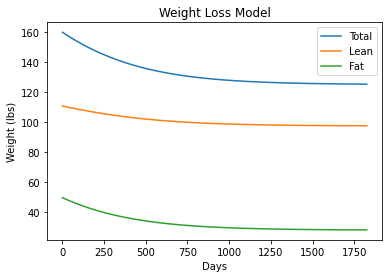

In [22]:

# solve IVP
t0 = 0 # days
tf = 5*365
t_span = (t0, tf)


# y0
PAL = 1.5
EI = 2025
y0 = np.array([F0, L0, PAL, EI])


# solve initial value problem
sol = solve_ivp(weight_odesystem, t_span, y0, t_eval=np.linspace(t0, tf))

# plot
# print(sol.y[0])
plt.plot(sol.t, sol.y[0]*2.204+sol.y[1]*2.204, label='Total')
plt.plot(sol.t, sol.y[1]*2.204, label='Lean')
plt.plot(sol.t, sol.y[0]*2.204, label='Fat')

plt.xlabel('Days')
plt.ylabel('Weight (lbs)')
plt.title('Weight Loss Model')
plt.legend(loc='best')

# Problem 7

Modify the preceding problem to handle a two stage weightloss intervention: Suppose for the first 16 weeks intake is reduced from 2143 to 1600 calories/day and physical activity is increased from little to no exercise (PAL=1.4) to an hour of exercise 5 days per week (PAL=1.7). The following 16 weeks intake is increased from 1600 to 2025 calories/day, and exercise is limited to only 2-3 days per week (PAL=1.5).

You will need to recompute F0, and L0 at the end of the first 16 weeks, but K will stay the same. Find and graph the solution curve over the 32 week period.

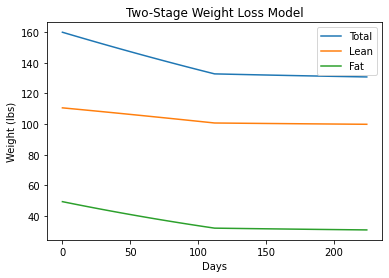

In [23]:
# solve IVP for first 16 weeks
t0 = 0 
tf = 16*7
t_span = (t0, tf)


# y0
PAL = 1.7
EI = 1600
y0 = np.array([F0, L0, PAL, EI])


# solve initial value problem
sol = solve_ivp(weight_odesystem, t_span, y0, t_eval=np.linspace(t0, tf))

t_1 = sol.t
y_1 = sol.y

# second 16 weeks
t0 = 16*7
tf = 32*7
t_span = (t0, tf)
# y0
PAL = 1.5
EI = 2025
y0 = np.array([sol.y[0][-1], sol.y[1][-1], PAL, EI])
# solve initial value problem
sol = solve_ivp(weight_odesystem, t_span, y0, t_eval=np.linspace(t0, tf))


# combine values
t_total = np.concatenate((t_1.reshape(1, -1), sol.t.reshape(1, -1)), axis=1)
y_total = np.concatenate((y_1, sol.y), axis=1)


# plot
plt.plot(t_total.squeeze(), y_total[0]*2.204+y_total[1]*2.204, label='Total')
plt.plot(t_total.squeeze(), y_total[1]*2.204, label='Lean')
plt.plot(t_total.squeeze(), y_total[0]*2.204, label='Fat')

plt.xlabel('Days')
plt.ylabel('Weight (lbs)')
plt.title('Two-Stage Weight Loss Model')
plt.legend(loc='best')